In [83]:
import warnings

import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import VotingClassifier
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from src.features import utils, build_features_final, build_features
from src.models import predict_model
from src.train.train import train, evaluation, prediction_to_csv
from src.data.make_dataset import DatasetLoader
from src.config.config import seed_everything, cfg

warnings.filterwarnings(action='ignore')
seed_everything(cfg.SEED)

scaler = MinMaxScaler()

train_data = pd.read_csv(r'data\processed\PCA_train_final_feature.csv')
test_data = pd.read_csv(r'data\processed\PCA_test_final_feature.csv')

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data_scaled)

# labels = kmeans.labels_
labels = kmeans.predict(test_data_scaled)
centers = kmeans.cluster_centers_
distances = np.linalg.norm(test_data_scaled - centers[labels], axis=1)
threshold = np.percentile(distances, 95)
anomalies = test_data[distances > threshold]

result = np.zeros(len(test_data))
result[[anomalies.index]] = 1

submission = prediction_to_csv(result)

"""submission = pd.read_csv(cfg.SUBMISSION_PATH)
submission['label'] = 0
submission.loc[anomalies.index, 'label'] = 1"""

label
0.0    7019
1.0     370
Name: count, dtype: int64


"submission = pd.read_csv(cfg.SUBMISSION_PATH)\nsubmission['label'] = 0\nsubmission.loc[anomalies.index, 'label'] = 1"

In [145]:
scaler = MinMaxScaler()

train_data = pd.read_csv(r'data\raw\train_data.csv')
train_data = build_features.create_derived_features(train_data)

test_data = pd.read_csv(r'data\raw\test_data.csv')
test_data = build_features.create_derived_features(test_data)

scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

scaled_train_data = pd.DataFrame(scaled_train_data, columns=train_data.columns)
scaled_test_data = pd.DataFrame(scaled_test_data, columns=train_data.columns)

scaled_train_data_df = scaled_train_data.copy()
scaled_test_data_df = scaled_test_data.copy()

grouped_train = scaled_train_data.groupby('type')

drop_feature = ['type', 'motor_hp', 'air_end_temp', 'motor_rpm', 'motor_temp', 'motor_vibe', 'motor_current',
                'air_inflow', "air_flow_pressure", "current_by_vibration", "airflow_per_rotation", "air_to_motor_ratio"]

result = np.zeros(len(scaled_test_data_df))

for group_name, group_data in grouped_train:
    test_group = scaled_test_data[scaled_test_data['type'] == group_name]
    train_group = group_data.drop(drop_feature, axis=1)
    test_group = test_group.drop(drop_feature, axis=1)

    kmeans = KMeans(n_clusters=50, random_state=42).fit(train_group)

    train_labels = kmeans.predict(train_group)
    labels = kmeans.predict(test_group)
    centers = kmeans.cluster_centers_
    # train_distance = max(np.linalg.norm(train_group - centers[train_labels], axis=1))
    
    distances = np.linalg.norm(test_group - centers[labels], axis=1)
    threshold = np.percentile(distances, 95)
    anomalies = test_group[distances >= threshold]
    
    result[[anomalies.index]] = 1

    print(f"finish {group_name}type")

anomaly = pd.Series(result)
submission = prediction_to_csv(anomaly)

finish 0.0type
finish 0.14285714285714285type
finish 0.2857142857142857type
finish 0.42857142857142855type
finish 0.5714285714285714type
finish 0.7142857142857142type
finish 0.8571428571428571type
finish 1.0type
label
0.0    7016
1.0     373
Name: count, dtype: int64


In [146]:
test_data['label'] = result
def no_out(test_data):
    test7342 = test_data[7342:7361]
    
    no = test7342[test7342['label']==1]
    yes = test7342[test7342['label']==0]
    return yes, no
yes, no = no_out(test_data)

Chunk 0: 65/1296 labels with value 1


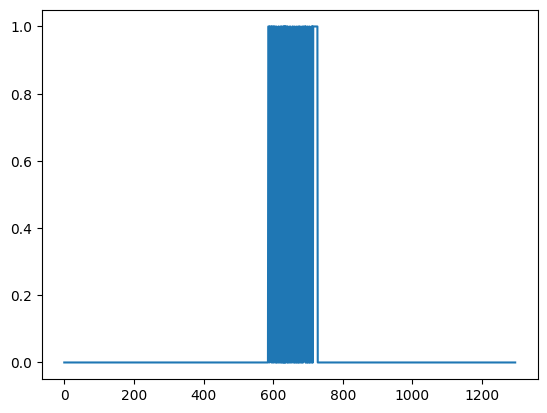

Chunk 1: 56/1107 labels with value 1


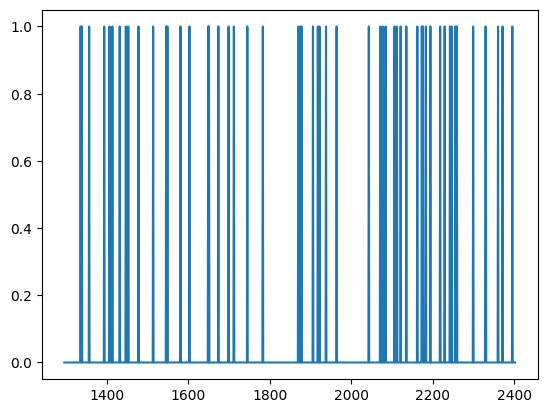

Chunk 2: 55/1098 labels with value 1


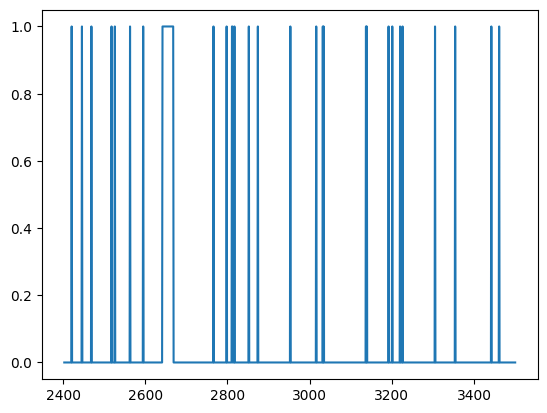

Chunk 3: 46/918 labels with value 1


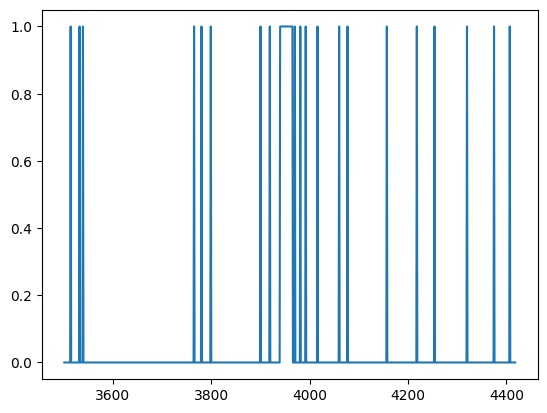

Chunk 4: 46/918 labels with value 1


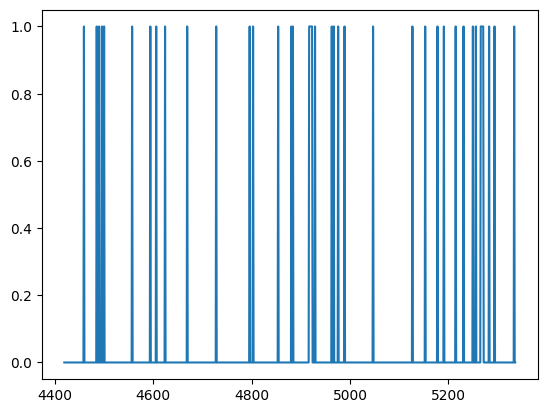

Chunk 5: 37/746 labels with value 1


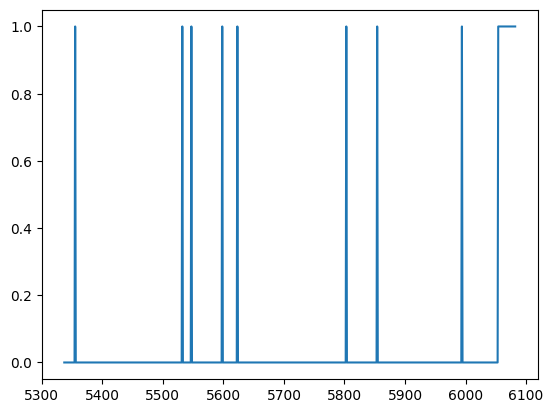

Chunk 6: 39/748 labels with value 1


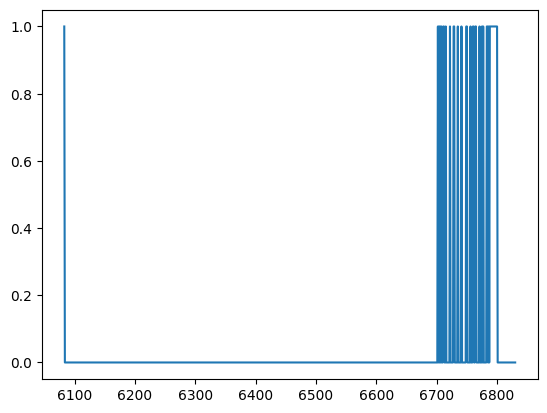

Chunk 7: 29/558 labels with value 1


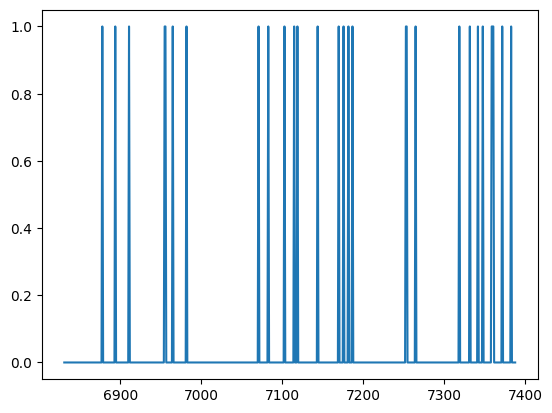

In [147]:
def plot_label_counts(predictions, chunk_sizes):
    for i, (start, end) in enumerate(chunk_sizes):
        chunk = predictions[start:end]
        num_labels = len(chunk[chunk['label'] == 1])
        print(f"Chunk {i}: {num_labels}/{len(chunk)} labels with value 1")
        plt.plot(chunk['label'])
        plt.show()
ranges = [(0, 1296), (1296, 2403), (2403, 3501), (3501, 4419), (4419, 5337), (5337, 6083), (6083, 6831), (6831, len(test_data))]
plot_label_counts(submission, ranges)